<font size="+5">#09. Componentes Principales (PCA)</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> - Simplemente, copiamos y pegamos las siguientes líneas de código para cargar los datos.
> - La tabla contiene **estadísticas sobre Accidentes de Coche** (columnas).
> - En cada uno de los **Estados de USA** (filas).

```python
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(10)
```

In [7]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
NC,16.8,6.552,5.208,15.792,13.608,708.24,127.82
NM,18.4,3.496,4.968,12.328,18.032,869.85,120.75
MA,8.2,1.886,2.870,7.134,6.560,1011.14,135.63
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
TN,19.5,4.095,5.655,15.990,15.795,767.91,155.57
SD,19.4,6.014,6.402,19.012,16.684,669.31,96.87
VT,13.6,4.080,4.080,13.056,12.920,716.20,109.61
ND,23.9,5.497,10.038,23.661,20.554,688.75,109.72
WA,10.6,4.452,3.498,8.692,9.116,890.03,111.62


# Escalar Variables

- Para que las variables sean **comparables**.
- Usaremos el `StandardScaler()`.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
import pandas as pd

In [10]:
dfnorm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
dfnorm.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
AZ,0.688443,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778
AR,1.619498,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125
CA,-0.928653,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178


# Modelo de k-Means en Python

## Entrenar Modelo

> - Seleccionamos **todas** las variables `model.fit(X=df)`.
> - Y agruparemos **4 clusters**.

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=4)

In [7]:
model.fit(dfnorm)

KMeans(n_clusters=4)

In [8]:
model.fit(X=dfnorm)

KMeans(n_clusters=4)

## Predicciones con el Modelo

> - `model.predict()`
> - Guardamos el resultado como **columna nueva** `df`.

In [9]:
pred = model.predict(X=dfnorm)

## Visualización del Modelo

> - Las coordenadas de los puntos son los **datos reales**.
> - El modelo se dibuja **coloreando** los puntos.

In [10]:
sns.scatterplot(x='ins_premium', y='total', data=dfnorm, hue='pred', palette='Set1')

ValueError: Could not interpret value `pred` for parameter `hue`

In [11]:
import plotly.express as px

In [12]:
px.scatter_3d(x='ins_premium', y='total', z='alcohol', data_frame=dfnorm, color=dfnorm.pred.astype(str))

AttributeError: 'DataFrame' object has no attribute 'pred'

## Interpretación del Modelo

> - Hay algo **muy raro** en el modelo.
> - Los puntos **están mezclados** entre los grupos.
> Por qué?
> - Tan solo estamos representando 2 variables.
> - Y hemos usado todas en `model.fit()`

# Agrupación de Variables con PCA

> - En el **siguiente vídeo** obtendrás una explicación del modelo.
> - https://www.youtube.com/watch?v=HMOI_lkzW08

<AxesSubplot:>

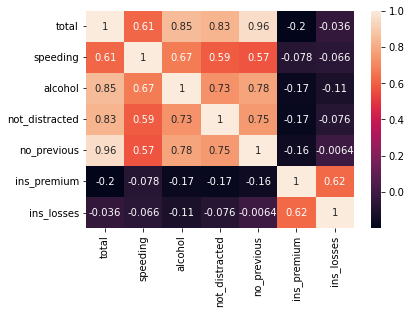

In [13]:
sns.heatmap(dfnorm.corr(), annot=True)

## Transformar los Datos a Componentes

> - PCA es otra forma de transformar los datos.
> - Para hacer, usamos el objeto `PCA()`.
> ¿Cómo ha ido evolucionando la tabla de datos, pues?
> 1. Datos Originales `df`.
> 2. Datos Normalizados `dfnorm`.
> 3. Datos Componentes Principales `dfpca` (ahora).

In [14]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
dfpca = pd.DataFrame(pca.fit_transform(dfnorm), index=df.index)

pca_columns = ['PC' + str(i+1) for i in range(pca.n_components_)]
dfpca.columns = pca_columns

dfpca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
abbrev,,,,,,,
AL,1.603671,0.133449,0.317881,-0.795293,-0.579719,0.046223,0.210185
AK,1.144212,0.858234,0.736626,0.318988,-0.228701,-1.002625,0.008966
AZ,1.432172,-0.420506,0.338136,0.552513,0.168718,-0.804523,-0.076107
AR,2.491584,0.348968,-1.788747,0.264064,-0.372382,-0.481849,-0.147636
CA,-1.750638,0.633625,-0.136176,-0.974916,-0.315811,0.178510,-0.068958


## Visualizar Componentes con Cluster

> - Un simple **scatterplot** con `PC1` y `PC2`.
> - Colorear puntos según grupos.
> - Están **mezclados** los puntos ahora?

<AxesSubplot:xlabel='alcohol', ylabel='ins_premium'>

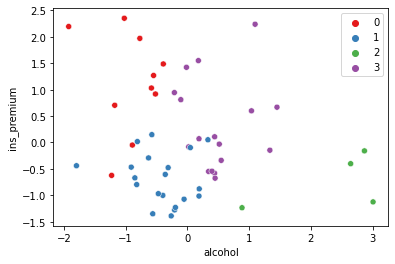

In [24]:
sns.scatterplot(x='alcohol', y='ins_premium', data=dfnorm, hue=pred, palette='Set1')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

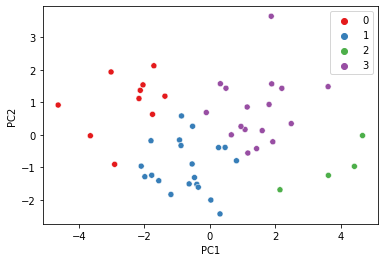

In [25]:
sns.scatterplot(x='PC1', y='PC2', data=dfpca, hue=pred, palette='Set1')

## Relación entre Variables Originales y las Componentes

> 1. **Influencia** de Variables Originales en PCA
> 2. Cómo calculamos un valor con PCA?
> 3. **Por qué** son x variables las que influyen x componente?

In [32]:
dfpca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
abbrev,,,,,,,
AL,1.603671,0.133449,0.317881,-0.795293,-0.579719,0.046223,0.210185
AK,1.144212,0.858234,0.736626,0.318988,-0.228701,-1.002625,0.008966
AZ,1.432172,-0.420506,0.338136,0.552513,0.168718,-0.804523,-0.076107
AR,2.491584,0.348968,-1.788747,0.264064,-0.372382,-0.481849,-0.147636
CA,-1.750638,0.633625,-0.136176,-0.974916,-0.315811,0.178510,-0.068958


<AxesSubplot:>

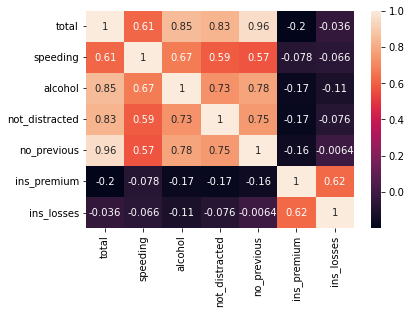

In [39]:
sns.heatmap(dfnorm.corr(), annot=True)

In [40]:
loadings = pd.DataFrame(pca.components_.T, columns=pca_columns, index=df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
total,0.479471,0.068938,-0.269088,0.038956,0.145977,-0.169705,0.800825
speeding,0.375347,0.076585,0.818269,-0.363749,-0.022828,-0.224792,0.017848
alcohol,0.454376,0.033458,0.082933,0.148344,0.354798,0.783768,-0.152858
not_distracted,0.438033,0.042375,-0.126168,0.171266,-0.856469,0.085105,-0.142478
no_previous,0.457034,0.096129,-0.317988,0.039481,0.336110,-0.504012,-0.558754
ins_premium,-0.130832,0.685227,0.256142,0.656396,0.042145,-0.115773,0.041266
ins_losses,-0.069960,0.712524,-0.261735,-0.618399,-0.063272,0.178052,-0.028050


In [41]:
pca.explained_variance_ratio_

array([0.57342168, 0.22543042, 0.07865743, 0.05007557, 0.04011   ,
       0.02837999, 0.00392491])

In [42]:
pca.explained_variance_ratio_.cumsum()

array([0.57342168, 0.7988521 , 0.87750953, 0.9275851 , 0.9676951 ,
       0.99607509, 1.        ])

In [34]:
loadings.loc[:, 'PC1']

total             0.479471
speeding          0.375347
alcohol           0.454376
not_distracted    0.438033
no_previous       0.457034
ins_premium      -0.130832
ins_losses       -0.069960
Name: PC1, dtype: float64

In [ ]:
dfnorm.loc['AL',:]

total             0.737446
speeding          1.168148
alcohol           0.439938
not_distracted    1.002301
no_previous       0.277692
ins_premium      -0.580083
ins_losses        0.430514
Name: AL, dtype: float64

In [37]:
(dfnorm.loc['AL',:] * loadings.loc[:,'PC1']).sum()

1.6036712920638665

In [38]:
(dfnorm.loc['AL',:] * loadings.loc[:,'PC2']).sum()

0.13344926968042986

# Otras Técnicas para Agrupar Variables

> - En la siguiente página web veremos varias técnicas de **Reducción de Variables**:
> - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition